this scans the ECS tasks table in WCMC and so requires local AWS properties to be defined

In [37]:
from pandas import to_datetime, NamedAgg
from lcb.cisvis.ecs import history
import pandas as pd
ecsTasks = history()
tasks = pd.DataFrame(ecsTasks)

tasks


,task,stoppedAt,cpu,taskDefinition,digest,status,memory,stopReason,env,image,startedAt,exitCode,id
0,secure-carrot-runner,2020-06-15T22:00:48.475Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:675b466d7f3c349d97a70628bc432e8f51c41a8...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-15T21:58:10.15Z,0,2e926d42-5be4-6127-1e3d-1e5f7fe0e426
1,secure-carrot-runner,2020-06-06T03:54:09.738Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:c8cbaadd56f6fd7907dafb376a6247469132e35...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-06T03:50:10.914Z,0,f57e54e4-e9ec-c5c6-62ff-b6f16d6b99fb
2,secure-carrot-runner,2020-06-17T23:07:34.063Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:95ed18d8a4e2a1da774b9b1619e12d2bed2e45b...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-17T23:04:51.595Z,0,98b906aa-d90a-aa52-e92c-ce6db6c77da9
3,secure-carrot-runner,2020-06-20T02:02:45.808Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:fec01d4676e8ce9e56d1d4fa4f3ab35c0412360...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-20T01:52:58.52Z,0,04167c86-425e-c788-3c5f-08ebf45c3474
4,secure-carrot-runner,2020-06-22T17:55:26.863Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:fec01d4676e8ce9e56d1d4fa4f3ab35c0412360...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-22T17:51:35.55Z,0,91e35f87-ca8a-938a-f14f-a9f9384fbddf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21270,secure-carrot-runner,2020-06-17T23:34:21.042Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:95ed18d8a4e2a1da774b9b1619e12d2bed2e45b...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-17T23:33:06.988Z,0,5f4d9906-1360-ed6b-c6aa-d48148043131
21271,secure-carrot-runner,2020-06-15T03:40:35.439Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:2810d2310f76b72709589a61a2a0cd5af77332e...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-15T03:36:02.952Z,0,da08f7f5-90d4-21b8-1e09-c11ea8cface9
21272,secure-carrot-aggregator,2020-05-30T23:20:10.895Z,2048,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:d6165bd93363bf7d69a2b0048957d2b0abc54b7...,STOPPED,10240,Essential container in task exited,"[{'name': 'CARROT_JOB', 'value': 'splashone_ne...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-05-30T23:16:04.138Z,0,0b413c73-6838-a42b-5baa-a8bc9a44273c
21273,secure-carrot-runner,2020-06-21T16:33:14.127Z,1024,arn:aws:ecs:us-west-2:702514165722:task-defini...,sha256:fec01d4676e8ce9e56d1d4fa4f3ab35c0412360...,STOPPED,8192,Essential container in task exited,"[{'name': 'SPRING_PROFILES_ACTIVE', 'value': '...",702514165722.dkr.ecr.us-west-2.amazonaws.com/c...,2020-06-21T16:30:10.047Z,0,34723289-d3bd-51b5-bbbb-986e89dfa044


In [38]:
tasks['duration'] = to_datetime(tasks['stoppedAt']) - to_datetime(tasks['startedAt'])
tasks['duration_s'] = tasks['duration'].apply(lambda x: x.total_seconds())
tasks['date'] = to_datetime(tasks['stoppedAt'])
tasks['date'] = tasks['date'].apply(lambda x: x.date())

In [39]:

tasks_per_day = tasks.groupby(to_datetime(tasks['date'])).agg(
    max_duration = NamedAgg(column='duration_s',aggfunc=max),
    min_duration = NamedAgg(column='duration_s',aggfunc=min),
    avg_duration = NamedAgg(column='duration_s',aggfunc='mean'),
    count = NamedAgg(column='duration_s',aggfunc='count')


)

In [48]:
tasks_per_day.tail(5)

,max_duration,min_duration,avg_duration,count
date,,,,
2020-06-20,7384.085,61.370,676.854472,1505
2020-06-21,1447.245,59.459,244.252171,2723
2020-06-22,8838.713,59.312,507.526151,1650
2020-06-23,48707.756,31.245,6243.963111,1013
2020-06-24,9938.025,63.019,1898.144077,573


Histogram of the duration of tasks

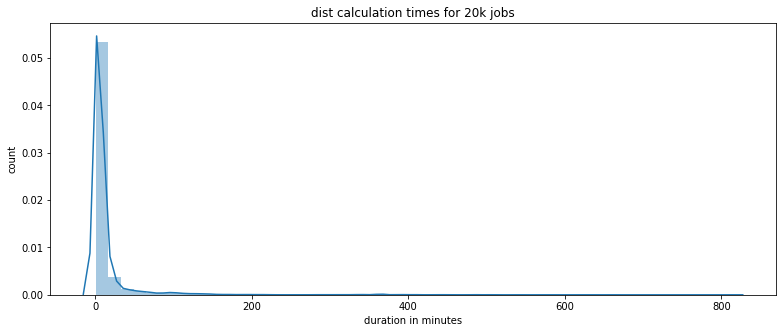

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(figsize=(13,5))
p = sns.distplot(tasks['duration_s']/60,ax=axes)
plt.title("dist calculation times for 20k jobs")
#plt.xlim(-10, 75)

p.set(xlabel="duration in minutes", ylabel="count")
plt.show()


In [46]:
tasks_per_day

,max_duration,min_duration,avg_duration,count
date,,,,
2020-05-27,3927.907,60.533,976.901705,292
2020-05-28,1113.366,60.614,284.350780,759
2020-05-29,889.751,160.014,353.706421,114
2020-05-30,903.686,58.030,323.842670,631
2020-06-01,1331.831,59.363,313.657577,319
2020-06-04,995.361,57.515,248.714663,945
2020-06-05,1138.868,58.507,286.780150,1244
2020-06-06,321.908,61.589,199.273829,280
2020-06-10,1223.754,59.057,384.671138,715
